## Training a simple Tree

In [4]:
import numpy
import matplotlib.pyplot as plot
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO


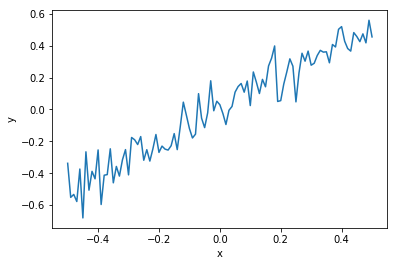

In [5]:
#Build a simple data set with y = x + random
nPoints = 100

#x values for plotting
xPlot = [(float(i)/float(nPoints) - 0.5) for i in range(nPoints + 1)]

#x needs to be list of lists.
x = [[s] for s in xPlot]

#y (labels) has random noise added to x-value
#set seed
numpy.random.seed(1)
y = [s + numpy.random.normal(scale=0.1) for s in xPlot]

plot.plot(xPlot,y)
plot.axis('tight')
plot.xlabel('x')
plot.ylabel('y')
plot.show()

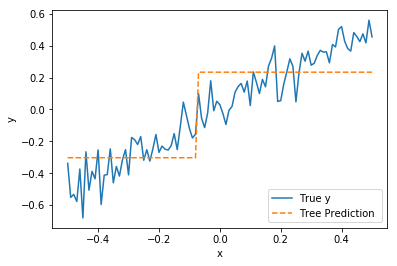

In [6]:
simpleTree = DecisionTreeRegressor(max_depth=1)
simpleTree.fit(x, y)

#draw the tree
with open("simpleTree.dot", 'w') as f:
    f = tree.export_graphviz(simpleTree, out_file=f)

#compare prediction from tree with true values

yHat  = simpleTree.predict(x)

plot.figure()
plot.plot(xPlot, y, label='True y')
plot.plot(xPlot, yHat, label='Tree Prediction ', linestyle='--')
plot.legend(bbox_to_anchor=(1,0.2))
plot.axis('tight')
plot.xlabel('x')
plot.ylabel('y')
plot.show()


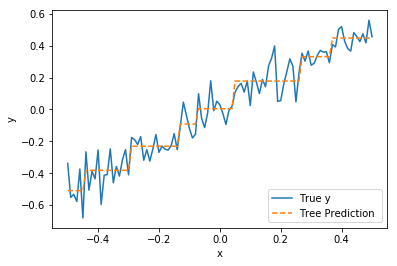

In [9]:
simpleTree2 = DecisionTreeRegressor(max_depth=3)
simpleTree2.fit(x, y)

#draw the tree
with open("simpleTree2.dot", 'w') as f:
    f = tree.export_graphviz(simpleTree2, out_file=f)

yHat  = simpleTree2.predict(x)

plot.figure()
plot.plot(xPlot, y, label='True y')
plot.plot(xPlot, yHat, label='Tree Prediction ', linestyle='--')
plot.legend(bbox_to_anchor=(1,0.2))
plot.axis('tight')
plot.xlabel('x')
plot.ylabel('y')
plot.show()

## Balancing Binary Tree Complexity for Best Performance
----
**cross-validation can be performed to control overfitting**

10-fold cross-validation run on trees of a variety of depths for this 
simple problem. The code shows two loops. The outer one defines the 
tree depth for the inner cross-validation loop. The inner loop divides the data 
up and makes 10 passes to calculate out of sample errors. The mean squared 
error (MSE) results for each depth are plotted

In [11]:
#Build a simple data set with y = x + random
nPoints = 100

#x values for plotting
xPlot = [(float(i)/float(nPoints) - 0.5) for i in range(nPoints + 1)]

#x needs to be list of lists.
x = [[s] for s in xPlot]

#y (labels) has random noise added to x-value
#set seed
numpy.random.seed(1)
y = [s + numpy.random.normal(scale=0.1) for s in xPlot]

nrow = len(x)

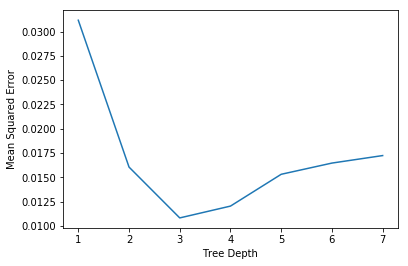

In [13]:
#fit trees with several different values for depth and use x-validation to see which works best.

depthList = [1, 2, 3, 4, 5, 6, 7]
xvalMSE = []
nxval = 10

for iDepth in depthList:

    #build cross-validation loop to fit tree and evaluate on out of sample data
    for ixval in range(nxval):

        #Define test and training index sets
        idxTest = [a for a in range(nrow) if a%nxval == ixval%nxval]
        idxTrain = [a for a in range(nrow) if a%nxval != ixval%nxval]

        #Define test and training attribute and label sets
        xTrain = [x[r] for r in idxTrain]
        xTest = [x[r] for r in idxTest]
        yTrain = [y[r] for r in idxTrain]
        yTest = [y[r] for r in idxTest]

        #train tree of appropriate depth and accumulate out of sample (oos) errors
        treeModel = DecisionTreeRegressor(max_depth=iDepth)
        treeModel.fit(xTrain, yTrain)

        treePrediction = treeModel.predict(xTest)
        error = [yTest[r] - treePrediction[r] for r in range(len(yTest))]

        #accumulate squared errors
        if ixval == 0:
            oosErrors = sum([e * e for e in error])
        else:
            #accumulate predictions
            oosErrors += sum([e * e for e in error])

    #average the squared errors and accumulate by tree depth

    mse = oosErrors/nrow
    xvalMSE.append(mse)

plot.plot(depthList, xvalMSE)
plot.axis('tight')
plot.xlabel('Tree Depth')
plot.ylabel('Mean Squared Error')
plot.show()

## Building Decsion tree for wine quality data

In [1]:
import urllib.request, urllib.error, urllib.parse
import numpy
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO
from math import sqrt
import matplotlib.pyplot as plot

In [2]:
#read data into iterable
target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = urllib.request.urlopen(target_url)

xList = []
labels = []
names = []
firstLine = True
for line in data:
    if firstLine:
        names = line.decode().strip().split(";")
        firstLine = False
    else:
        #split on semi-colon
        row = line.decode().strip().split(";")
        #put labels in separate array
        labels.append(float(row[-1]))
        #remove label from row
        row.pop()
        #convert row to floats
        floatRow = [float(num) for num in row]
        xList.append(floatRow)


In [12]:
nrows = len(xList)
ncols = len(xList[0])

wineTree = DecisionTreeRegressor(max_depth=3)

wineTree.fit(xList, labels)

with open("wineTree.dot", 'w') as f:
    f = tree.export_graphviz(wineTree, out_file=f)
#Note: The code above exports the trained tree info to a Graphviz "dot" file.
#Drawing the graph requires installing GraphViz and the running the following on the command line
#dot -Tpng wineTree.dot -o wineTree.png
